<h1>Installing necessary Libraries</h1>

In [1]:
pip install scikit-learn-intelex


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
!pip install modin[ray]

/bin/bash: /glob/intel-python/python2/bin/pip: /glob/intel-python/versions/2018u2/intelpython2/bin/python: bad interpreter: No such file or directory


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [5]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress the warning
warnings.filterwarnings(action='ignore', category=UserWarning)


<h1>Data Pre-Processing</h1>

In [6]:
import os
os.environ["MODIN_ENGINE"] = "ray"  # Specify the engine you want to use (e.g., "ray", "dask", or "native")

import pandas as pd

In [7]:
data = pd.read_csv('Final_data.csv')

In [8]:
print(data.head)
print(" ---------------------------------------------- ")
print(data.describe())

<bound method NDFrame.head of            Temp_K  pressure_hPa  humidity_percent  cloudiness_percent  \
0      305.136748   1007.668578                77                  81   
1      306.632430    998.016072                45                  19   
2      311.196136    988.736740                10                  26   
3      287.436201    981.742594                30                  90   
4      304.757082   1000.575716                28                  19   
...           ...           ...               ...                 ...   
99603  292.819616   1013.101585                11                  17   
99604  280.929076   1010.173871                75                  56   
99605  300.973695    999.634586                33                  45   
99606  297.390506   1026.954822                30                  52   
99607  280.468139   1007.610720                88                  25   

       sea_level_hPa  grnd_level_hPa  visibility_km  wind_speed_m_sec  \
0         954.372246

In [9]:
data.isnull().sum()   #check if any null value

Temp_K                0
pressure_hPa          0
humidity_percent      0
cloudiness_percent    0
sea_level_hPa         0
grnd_level_hPa        0
visibility_km         0
wind_speed_m_sec      0
rain_volume_mm        0
snow_volume_mm        0
State                 0
Substation            0
Type (AIS/ GIS)       0
Risk                  0
dtype: int64

In [10]:
data.columns

Index(['Temp_K', 'pressure_hPa', 'humidity_percent', 'cloudiness_percent',
       'sea_level_hPa', 'grnd_level_hPa', 'visibility_km', 'wind_speed_m_sec',
       'rain_volume_mm', 'snow_volume_mm', 'State', 'Substation',
       'Type (AIS/ GIS)', 'Risk'],
      dtype='object')

In [11]:
data.dropna(axis = 0)

,Temp_K,pressure_hPa,humidity_percent,cloudiness_percent,sea_level_hPa,grnd_level_hPa,visibility_km,wind_speed_m_sec,rain_volume_mm,snow_volume_mm,State,Substation,Type (AIS/ GIS),Risk
0,305.136748,1007.668578,77,81,954.372246,1021.889085,10.480379,3.799810,66.021771,2.891291,Kerala,TRISSUR HVDC,AIS,1
1,306.632430,998.016072,45,19,1012.982118,998.411000,16.051354,25.905855,61.885144,3.748578,Tamil Nadu,SALEM,AIS,1
2,311.196136,988.736740,10,26,956.396651,1018.965530,29.658817,24.782610,28.065332,4.622073,Karnataka,MYSORE,AIS,1
3,287.436201,981.742594,30,90,983.988918,997.641400,22.893604,37.336499,26.855636,3.764864,Karnataka,RAICHUR,AIS,0
4,304.757082,1000.575716,28,19,960.823766,975.733222,8.360576,43.033714,9.948649,4.200703,Tamil Nadu,HOSUR,AIS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99603,292.819616,1013.101585,11,17,1029.270922,970.494358,23.947437,19.535539,94.021017,4.177869,Karnataka,RAICHUR,AIS,1
99604,280.929076,1010.173871,75,56,1013.579730,1028.112688,1.627375,48.461543,76.895227,4.945975,Tamil Nadu,HOSUR,AIS,1
99605,300.973695,999.634586,33,45,974.271053,1003.193781,24.589207,18.515266,76.955028,4.833557,Andhra Pradesh,SRIKAKULAM,GIS,0
99606,297.390506,1026.954822,30,52,960.838588,994.284506,28.096407,1.850919,33.408153,3.251165,Tamil Nadu,SALEM,AIS,1


In [12]:
data.columns

Index(['Temp_K', 'pressure_hPa', 'humidity_percent', 'cloudiness_percent',
       'sea_level_hPa', 'grnd_level_hPa', 'visibility_km', 'wind_speed_m_sec',
       'rain_volume_mm', 'snow_volume_mm', 'State', 'Substation',
       'Type (AIS/ GIS)', 'Risk'],
      dtype='object')

In [13]:
print(data.isnull().sum())

Temp_K                0
pressure_hPa          0
humidity_percent      0
cloudiness_percent    0
sea_level_hPa         0
grnd_level_hPa        0
visibility_km         0
wind_speed_m_sec      0
rain_volume_mm        0
snow_volume_mm        0
State                 0
Substation            0
Type (AIS/ GIS)       0
Risk                  0
dtype: int64


In [14]:
df = data
print(df.columns)

Index(['Temp_K', 'pressure_hPa', 'humidity_percent', 'cloudiness_percent',
       'sea_level_hPa', 'grnd_level_hPa', 'visibility_km', 'wind_speed_m_sec',
       'rain_volume_mm', 'snow_volume_mm', 'State', 'Substation',
       'Type (AIS/ GIS)', 'Risk'],
      dtype='object')


In [15]:
# Get the index of each column separately
index_state = df.columns.get_loc('State')
index_substation = df.columns.get_loc('Substation')
index_type = df.columns.get_loc('Type (AIS/ GIS)')

# Store the indices in a list
columns_index = [index_state, index_substation, index_type]

# Delete columns up to 'Type (AIS/ GIS)'
columns_to_drop = df.columns[columns_index]

df.drop(columns=columns_to_drop, inplace=True)

In [16]:
print(df.columns)
df.head

Index(['Temp_K', 'pressure_hPa', 'humidity_percent', 'cloudiness_percent',
       'sea_level_hPa', 'grnd_level_hPa', 'visibility_km', 'wind_speed_m_sec',
       'rain_volume_mm', 'snow_volume_mm', 'Risk'],
      dtype='object')


<bound method NDFrame.head of            Temp_K  pressure_hPa  humidity_percent  cloudiness_percent  \
0      305.136748   1007.668578                77                  81   
1      306.632430    998.016072                45                  19   
2      311.196136    988.736740                10                  26   
3      287.436201    981.742594                30                  90   
4      304.757082   1000.575716                28                  19   
...           ...           ...               ...                 ...   
99603  292.819616   1013.101585                11                  17   
99604  280.929076   1010.173871                75                  56   
99605  300.973695    999.634586                33                  45   
99606  297.390506   1026.954822                30                  52   
99607  280.468139   1007.610720                88                  25   

       sea_level_hPa  grnd_level_hPa  visibility_km  wind_speed_m_sec  \
0         954.372246

In [17]:

df.columns

Index(['Temp_K', 'pressure_hPa', 'humidity_percent', 'cloudiness_percent',
       'sea_level_hPa', 'grnd_level_hPa', 'visibility_km', 'wind_speed_m_sec',
       'rain_volume_mm', 'snow_volume_mm', 'Risk'],
      dtype='object')

<h1>Data Split</h1>

In [18]:
y = df['Risk']

In [19]:
x = df.iloc[:,:-1]


In [20]:
print(x.head)
print(" ------------------------- ")
print(x.describe())
print(' --------------- ')
print(x.columns)

<bound method NDFrame.head of            Temp_K  pressure_hPa  humidity_percent  cloudiness_percent  \
0      305.136748   1007.668578                77                  81   
1      306.632430    998.016072                45                  19   
2      311.196136    988.736740                10                  26   
3      287.436201    981.742594                30                  90   
4      304.757082   1000.575716                28                  19   
...           ...           ...               ...                 ...   
99603  292.819616   1013.101585                11                  17   
99604  280.929076   1010.173871                75                  56   
99605  300.973695    999.634586                33                  45   
99606  297.390506   1026.954822                30                  52   
99607  280.468139   1007.610720                88                  25   

       sea_level_hPa  grnd_level_hPa  visibility_km  wind_speed_m_sec  \
0         954.372246

In [21]:
print(y.head)
print(' -------------------- ')
print(y.describe())

<bound method NDFrame.head of 0        1
1        1
2        1
3        0
4        1
        ..
99603    1
99604    1
99605    0
99606    1
99607    1
Name: Risk, Length: 99608, dtype: int64>
 -------------------- 
count    99608.000000
mean         0.499157
std          0.500002
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Risk, dtype: float64


In [22]:
from sklearn.model_selection import train_test_split

In [23]:

# Splitting the preprocessed data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<h1>Model Training</h1>

<h2>1. Random Forest Classifier</h2>

In [24]:
from sklearnex.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(x, y)

# Check the training score
train_score = rfc.score(x, y)
print("Training Score:", train_score)

Training Score: 0.9998594490402377


In [26]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
train_score = rfc.score(x_train, y_train)
print("Training Score:", train_score)

Training Score: 0.999913947651488


In [28]:
test_score = rfc.score(x_test, y_test)
print("Test Score:", test_score)

Test Score: 0.9035237425961249


<h2>2. Logistic Regression</h2>

In [29]:
from sklearnex.linear_model import LogisticRegression


In [30]:
logReg = LogisticRegression() 
logReg.fit(x_train, y_train)


LogisticRegression()

In [31]:
train_score_log = logReg.score(x_train, y_train)
print("Training Score:", train_score_log)

Training Score: 0.8478881319469344


In [32]:
test_score_log = logReg.score(x_test, y_test)
print("Test Score:", test_score_log)

Test Score: 0.8480741558745776


In [33]:
y_pred_log = logReg.predict(x_train)

<h2>3. SVC</h2>

In [34]:
from sklearnex.svm import SVC

In [35]:
svm = SVC(C=1.0, cache_size=100.0)
svm.fit(x_train, y_train)


SVC(cache_size=100.0)

In [36]:
train_score_svm = svm.score(x_train, y_train)
print("Training Score:", train_score_svm)

Training Score: 0.9013696665471496


In [37]:
test_score_svm = svm.score(x_test, y_test)
print("Test Score:", test_score_svm)

Test Score: 0.9018505504802061


# Ensembling The Models

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearnex.ensemble import RandomForestClassifier
from sklearnex.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve , confusion_matrix , classification_report , roc_curve , auc

# Initialize individual classifiers
rfc_algo = RandomForestClassifier(n_estimators=100, max_depth=5)
svm_algo = SVC(C=1.0, cache_size=200.0)

# Create an ensemble of classifiers
ensemble_model = VotingClassifier([('random_forest', rfc_algo), ('svm', svm_algo)], voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(x_train, y_train)

# Predict labels for testing data
predicted_labels_test = ensemble_model.predict(x_test)

# Calculate accuracy, precision, and F1 score for testing data
accuracy_test = accuracy_score(y_test, predicted_labels_test)
precision_test = precision_score(y_test, predicted_labels_test, average='weighted')
f1_test = f1_score(y_test, predicted_labels_test, average='weighted')

print("Accuracy Score :", accuracy_test)
print("Precision Score :", precision_test)
print("F1 Score Score :", f1_test)

Accuracy Score : 0.9026536826958471
Precision Score : 0.9026657228688783
F1 Score Score : 0.9026520513981455


# Output


In [39]:
import numpy as np
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_labels_test)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, predicted_labels_test)
print("Classification Report:\n", class_report)

# Get unique classes from y_test
classes = np.unique(y_test)

Confusion Matrix:
 [[13573  1411]
 [ 1498 13401]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     14984
           1       0.90      0.90      0.90     14899

    accuracy                           0.90     29883
   macro avg       0.90      0.90      0.90     29883
weighted avg       0.90      0.90      0.90     29883



/home/u219212/tmp/ipykernel_1747379/2140220738.py:12: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predicted_labels_test.ravel())


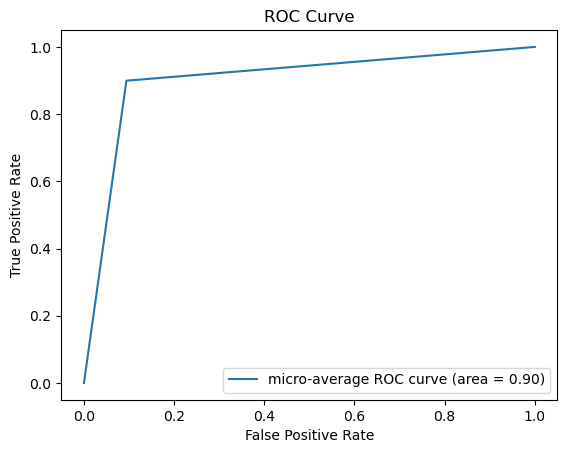

In [40]:
# Compute ROC curve and AUC for each class
import matplotlib.pyplot as plt

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test==classes[i], predicted_labels_test==classes[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predicted_labels_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

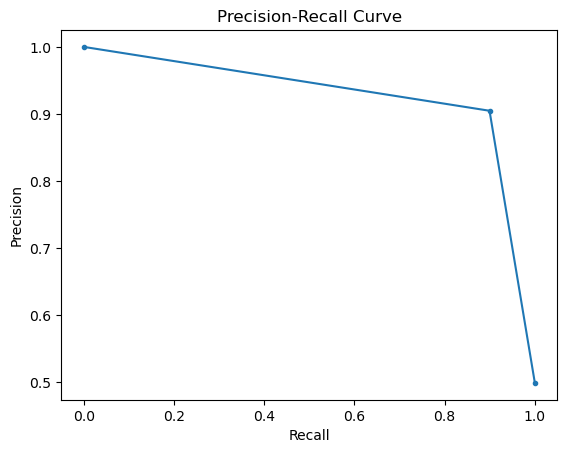

Average Precision Score: 0.8639024250213386


In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, predicted_labels_test)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Average Precision Score
avg_precision = average_precision_score(y_test, predicted_labels_test)
print("Average Precision Score:", avg_precision)


<h1>Saving the model</h1>

In [42]:
import pickle

model = {"model": ensemble_model}
with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [43]:
with open('ensemble_model.pkl', 'rb') as file:
    model = pickle.load(file)

out_loaded = model["model"]

In [44]:
import numpy as np
x_new = np.array([305.136748, 1007.668578, 77, 81, 954.3722462, 1021.889085, 10.4803795, 3.799810099, 66.02177058, 2.891290829])
x_new = x_new.reshape(1,-1)


In [45]:
y_pred = out_loaded.predict(x_new)
y_pred

array([1])

<h1>Real Time Prediction</h1>

<h2>Example 1</h2>

In [46]:
import requests

# Replace 'YOUR_API_KEY' with your actual API key obtained from OpenWeatherMap
API_KEY = 'a17ce8e6ea9e850661a216012b7103b2'

In [47]:
# API endpoint for current weather data by city name
url = f'http://api.openweathermap.org/data/2.5/weather?q=HYDERABAD&appid={API_KEY}'

# Send GET request to OpenWeatherMap API
response = requests.get(url)

# Check if request was successful (status code 200)
if response.status_code == 200:
    # Parse JSON response
    weather_data = response.json()

    # Extracting required weather features
    temperature_kelvin = weather_data['main']['temp']
    pressure_hPa = weather_data['main']['pressure']
    humidity_percent = weather_data['main']['humidity']
    cloudiness_percent = weather_data['clouds']['all']
    sea_level_hPa = weather_data['main'].get('sea_level', 970)
    grnd_level_hPa = weather_data['main'].get('grnd_level', 1000)
    visibility_km = weather_data.get('visibility', 'N/A') / 1000  # Converting meters to kilometers
    wind_speed_ms = weather_data['wind'].get('speed', 'N/A')
    rain_volume_mm = weather_data['rain'].get('1h', 'N/A') if 'rain' in weather_data else 66.0
    snow_volume_mm = weather_data['snow'].get('1h', 'N/A') if 'snow' in weather_data else 2.8

    # Store the values in an array
    weather_features = [temperature_kelvin, pressure_hPa, humidity_percent, cloudiness_percent,
                        sea_level_hPa, grnd_level_hPa, visibility_km, wind_speed_ms,
                        rain_volume_mm, snow_volume_mm]
    print("Weather Features Array:", weather_features)
else:
    print("Error:", response.status_code)


Weather Features Array: [310.38, 1015, 20, 20, 970, 1000, 6.0, 3.09, 66.0, 2.8]


In [48]:
Weather_Features = [309.38, 1016, 23, 20, 970, 1000, 6.0, 3.09, 66.0, 2.8]
import numpy as np
x_new = np.array(Weather_Features)
x_new = x_new.reshape(1,-1)
y_pred = out_loaded.predict(x_new)
y_pred

array([1])

<h2>Example 2</h2>

In [49]:
# API endpoint for current weather data by city name
url = f'http://api.openweathermap.org/data/2.5/weather?q=Srinagar&appid={API_KEY}'

# Send GET request to OpenWeatherMap API
response = requests.get(url)

# Check if request was successful (status code 200)
if response.status_code == 200:
    # Parse JSON response
    weather_data = response.json()

    # Extracting required weather features
    temperature_kelvin = weather_data['main']['temp']
    pressure_hPa = weather_data['main']['pressure']
    humidity_percent = weather_data['main']['humidity']
    cloudiness_percent = weather_data['clouds']['all']
    sea_level_hPa = weather_data['main'].get('sea_level', 970)
    grnd_level_hPa = weather_data['main'].get('grnd_level', 1000)
    visibility_km = weather_data.get('visibility', 'N/A') / 1000  # Converting meters to kilometers
    wind_speed_ms = weather_data['wind'].get('speed', 'N/A')
    rain_volume_mm = weather_data['rain'].get('1h', 'N/A') if 'rain' in weather_data else 66.0
    snow_volume_mm = weather_data['snow'].get('1h', 'N/A') if 'snow' in weather_data else 2.8

    # Store the values in an array
    weather_features = [temperature_kelvin, pressure_hPa, humidity_percent, cloudiness_percent,
                        sea_level_hPa, grnd_level_hPa, visibility_km, wind_speed_ms,
                        rain_volume_mm, snow_volume_mm]
    print("Weather Features Array:", weather_features)
else:
    print("Error:", response.status_code)


Weather Features Array: [289.26, 1018, 51, 9, 1018, 847, 10.0, 0.46, 66.0, 2.8]


In [50]:
import numpy as np
x_new = np.array([287.4362011,	981.7425945,	30,	90,	983.9889177,	997.6414,	22.89360378,	37.33649892,	26.85563639,	3.764864159])
x_new = x_new.reshape(1,-1)

In [51]:
y_pred = out_loaded.predict(x_new)
y_pred

array([0])